In [1]:
!pip install gdown

!gdown https://drive.google.com/uc?id=194bjp-C_4ShNR7vSoB90aN-Pt0Z8USeD


Downloading...
From: https://drive.google.com/uc?id=194bjp-C_4ShNR7vSoB90aN-Pt0Z8USeD
To: /content/MangoLeafBDDataset.zip
100% 108M/108M [00:00<00:00, 218MB/s] 


In [2]:
!unzip /content/MangoLeafBDDataset.zip

Archive:  /content/MangoLeafBDDataset.zip
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124249 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124306 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124253 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124252 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124250 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124302 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124301 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124256 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124310 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124312 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124305 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124334 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/2

In [3]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import keras
from keras import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D, Reshape, LSTM
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.applications import MobileNetV2

In [5]:
dir = '/content/MangoLeafBD Dataset'
labels = os.listdir(dir)
labels

['Bacterial Canker',
 'Die Back',
 'Cutting Weevil',
 'Healthy',
 'Sooty Mould',
 'Powdery Mildew',
 'Gall Midge',
 'Anthracnose']

In [6]:
for label in labels:
    print(label, len(os.listdir(dir+'/'+label)))

Bacterial Canker 500
Die Back 500
Cutting Weevil 500
Healthy 500
Sooty Mould 500
Powdery Mildew 500
Gall Midge 500
Anthracnose 500


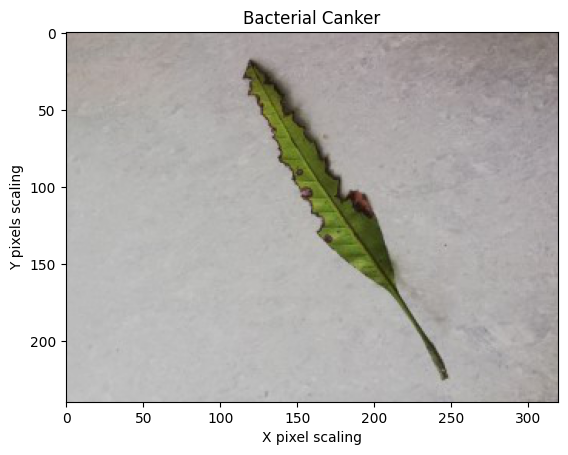

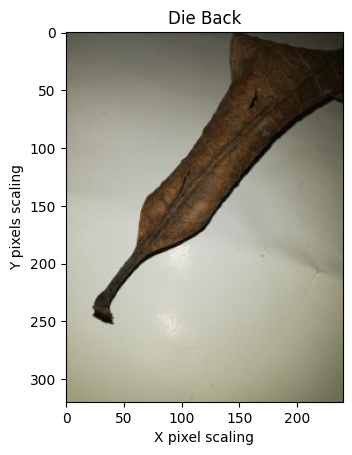

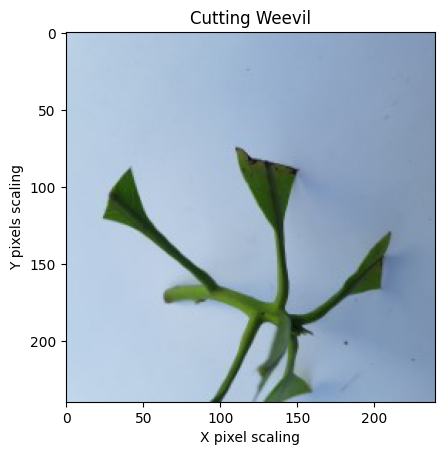

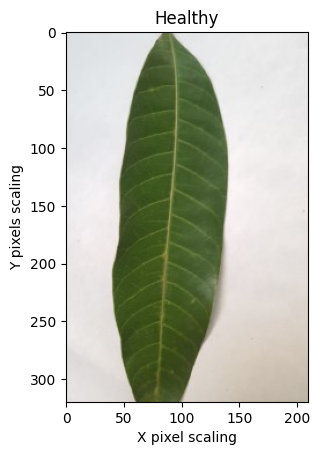

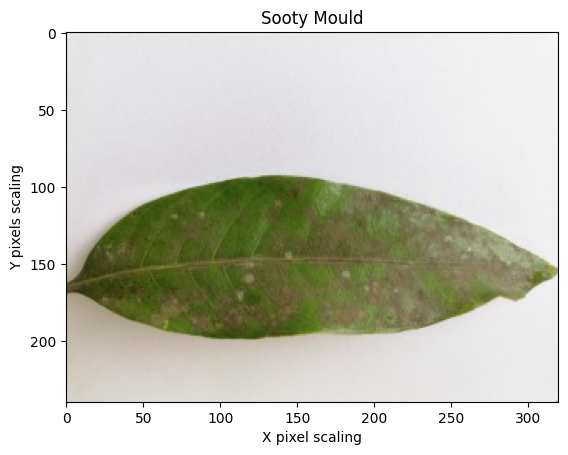

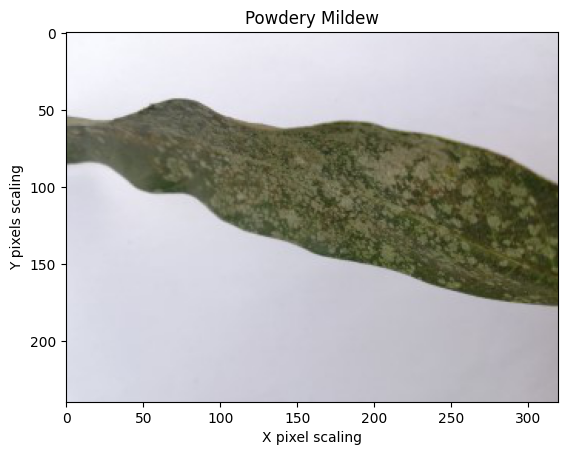

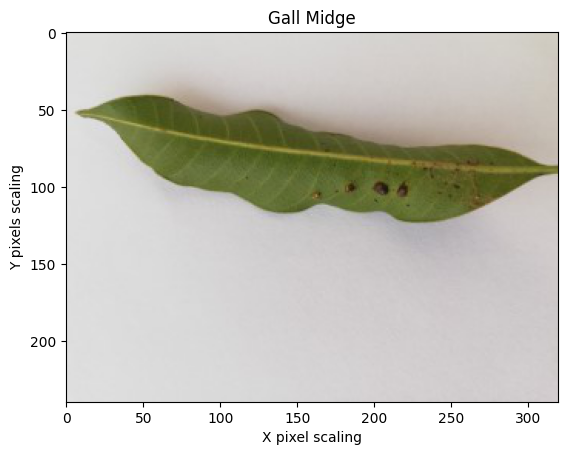

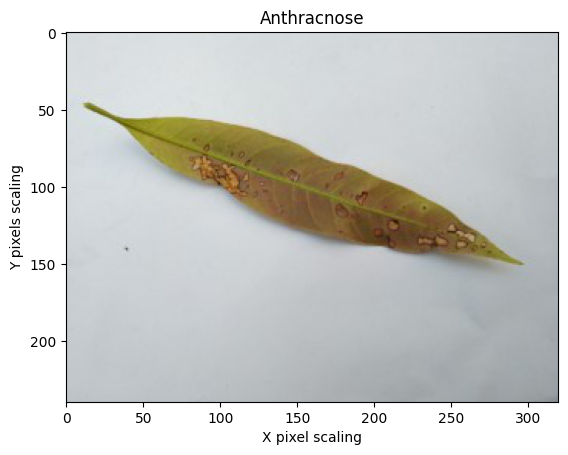

In [7]:
for label in labels:
    path = os.listdir(dir + '/' + label)
    img = dir + '/' + label + '/' + path[1]
    plt.title(label)
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
    image = mpimg.imread(img)
    plt.imshow(image)
    plt.show()

In [8]:
datagen = ImageDataGenerator(
    samplewise_center=True,
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255,
    validation_split=0.20
)

train_data = datagen.flow_from_directory(
    dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)
test_data = datagen.flow_from_directory(
    dir,
    target_size=(64,64),
    batch_size=32,
    shuffle=False,
    subset='validation'
)
validation_data = datagen.flow_from_directory(
    dir,
    target_size=(64,64),
    batch_size=32,
    shuffle=False,
    subset='validation'
)

Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


Found 4000 images belonging to 8 classes.


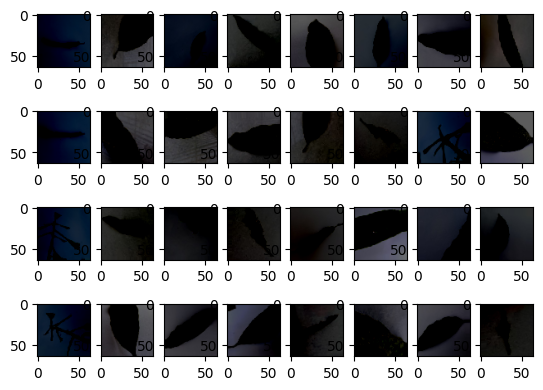

In [9]:
img_iter = datagen.flow_from_directory(dir,
                                       target_size=(64,64),
                                       batch_size=32)
x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(32):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [13]:
model=Sequential()
size=(64,64,3)
model.add(Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=size))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(8, activation='softmax'))##class number,in example i have 8 classes so i have given 8

#Compiling the model
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

#Training the model
base_model=model.fit(train_data, epochs=50, steps_per_epoch=len(train_data), validation_data=validation_data, validation_steps=len(validation_data))

Epoch 1/50
100/100 [==============================] - 30s 289ms/step - loss: 1.5897 - accuracy: 0.3528 - val_loss: 1.4048 - val_accuracy: 0.3988
Epoch 2/50
100/100 [==============================] - 21s 211ms/step - loss: 0.9112 - accuracy: 0.6331 - val_loss: 0.9705 - val_accuracy: 0.6525
Epoch 3/50
100/100 [==============================] - 23s 235ms/step - loss: 0.6543 - accuracy: 0.7544 - val_loss: 0.9430 - val_accuracy: 0.6450
Epoch 4/50
100/100 [==============================] - 23s 228ms/step - loss: 0.5359 - accuracy: 0.7947 - val_loss: 0.7725 - val_accuracy: 0.7163
Epoch 5/50
100/100 [==============================] - 24s 237ms/step - loss: 0.4635 - accuracy: 0.8325 - val_loss: 0.7600 - val_accuracy: 0.7375
Epoch 6/50
100/100 [==============================] - 22s 223ms/step - loss: 0.4140 - accuracy: 0.8525 - val_loss: 1.6729 - val_accuracy: 0.5838
Epoch 7/50
100/100 [==============================] - 23s 235ms/step - loss: 0.3529 - accuracy: 0.8691 - val_loss: 0.6554 - val_ac

In [14]:
print(base_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


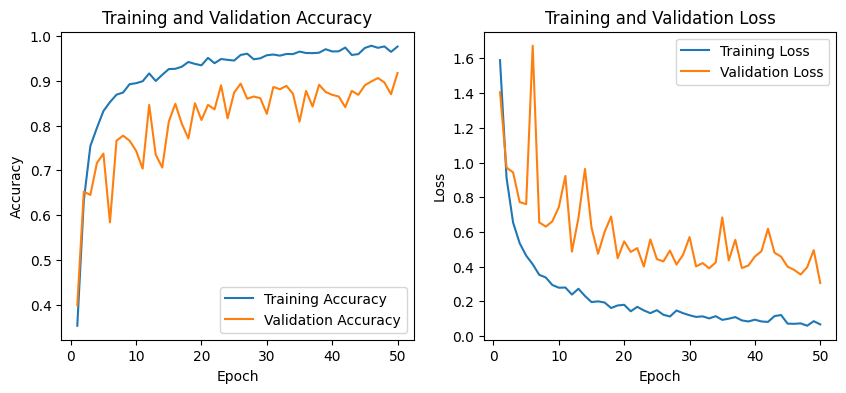

In [15]:
acc = base_model.history['accuracy']
val_acc = base_model.history['val_accuracy']
loss = base_model.history['loss']
val_loss = base_model.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
score = model.evaluate(test_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

25/25 [==============================] - 4s 157ms/step - loss: 0.3034 - accuracy: 0.9137
Test loss: 0.3033786118030548
Test accuracy: 0.9137499928474426


In [17]:
# Evaluate the model on the train, test, and validation data
train_acc = model.evaluate(train_data, verbose=0)[1]
test_acc = model.evaluate(test_data, verbose=0)[1]
val_acc = model.evaluate(validation_data, verbose=0)[1]

# Print out the validation accuracies for the train, test, and validation data
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)
print('Validation accuracy:', val_acc)


Train accuracy: 0.9887499809265137
Test accuracy: 0.90625
Validation accuracy: 0.9212499856948853


In [18]:
predict=model.predict(test_data)
# predict the class label
y_classes = predict.argmax(axis=-1)
y_classes

25/25 [==============================] - 4s 144ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 5, 5, 4, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

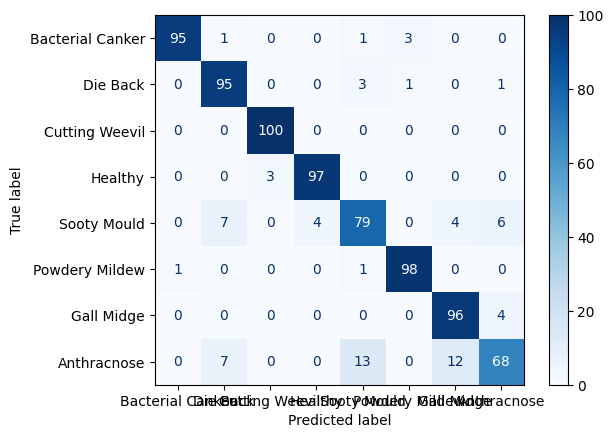

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
cm = confusion_matrix(test_data.classes, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)


disp.plot(cmap=plt.cm.Blues)
plt.show();

In [20]:
print(classification_report(test_data.classes, y_classes))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       100
           1       0.86      0.95      0.90       100
           2       0.97      1.00      0.99       100
           3       0.96      0.97      0.97       100
           4       0.81      0.79      0.80       100
           5       0.96      0.98      0.97       100
           6       0.86      0.96      0.91       100
           7       0.86      0.68      0.76       100

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from sklearn.metrics import classification_report

# Define the input shape
input_shape = (64, 64, 3)

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not trainable
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 model as the first layer
model = Sequential()
model.add(vgg16)

# Add additional layers to the model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))  # Update the number of units to 8 for 8 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
#base_model = model.fit(train_data, train_labels, epochs=50, steps_per_epoch=len(train_data), validation_data=(validation_data, validation_labels), validation_steps=len(validation_data))

# Get the predicted classes
y_pred = model.predict(test_data)
y_classes = y_pred.argmax(axis=-1)

# Print the classification report
print(classification_report(test_data.classes, y_classes))


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_14 (Flatten)        (None, 2048)              0         
                                                                 
 dense_48 (Dense)            (None, 256)               524544    
                                                                 
 dropout_30 (Dropout)        (None, 256)               0         
                                                                 
 dense_49 (Dense)            (None, 256)               65792     
                                                                 
 dropout_31 (Dropout)        (None, 256)               0         
                                                                 
 dense_50 (Dense)            (None, 128)             

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
### PREDICTION CELL

from PIL import Image
import numpy as np

# Upload an image file
uploaded = files.upload()

# Get the uploaded image file
image_path = next(iter(uploaded))

# Load and preprocess the image
image = Image.open(image_path)
image = image.resize((64, 64))  # Resize the image to match the input shape of the model
image_array = np.array(image) / 255.0  # Normalize the image

# Reshape the image array to match the input shape of the model
image_array = np.expand_dims(image_array, axis=0)

# Make predictions using the model
predictions = model.predict(image_array)
predicted_class_index = np.argmax(predictions[0])

# Define the class labels
class_labels = ['Bacterial Canker', 'Die Back', 'Cutting Weevil', 'Healthy', 'Sooty Mould', 'Powdery Mildew', 'Gall Midge', 'Anthracnose']

# Display the predicted class label
predicted_class_label = class_labels[predicted_class_index]
print("Predicted class:", predicted_class_label)


Saving a.jpg to a (4).jpg
1/1 [==============================] - 0s 79ms/step
Predicted class: Cutting Weevil


In [47]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 8.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
  

In [55]:
import gradio as gr
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from PIL import Image

# Define the input shape
input_shape = (64, 64, 3)

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not trainable
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 model as the first layer
model = Sequential()
model.add(vgg16)

# Add additional layers to the model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))  # Update the number of units to 8 for 8 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the class labels
class_labels = ['Bacterial Canker', 'Die Back', 'Cutting Weevil', 'Healthy', 'Sooty Mould', 'Powdery Mildew', 'Gall Midge', 'Anthracnose']

def classify_image(image):
    # Preprocess the image
    image = Image.fromarray(image.astype('uint8'))
    image = image.resize((64, 64))
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Make predictions using the model
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions[0])

    # Get the predicted class label
    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label

# Create the input and output interfaces
image_input = gr.inputs.Image()
label_output = gr.outputs.Textbox()

# Create the interface and run it
interface = gr.Interface(fn=classify_image, inputs=image_input, outputs=label_output)
interface.launch()


<ipython-input-55-63240ec44f93>:56: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image_input = gr.inputs.Image()
<ipython-input-55-63240ec44f93>:56: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image_input = gr.inputs.Image()
<ipython-input-55-63240ec44f93>:57: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label_output = gr.outputs.Textbox()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [56]:
import gradio as gr
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from PIL import Image

# Define the input shape
input_shape = (64, 64, 3)

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not trainable
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 model as the first layer
model = Sequential()
model.add(vgg16)

# Add additional layers to the model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))  # Update the number of units to 8 for 8 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the class labels
class_labels = ['Bacterial Canker', 'Die Back', 'Cutting Weevil', 'Healthy', 'Sooty Mould', 'Powdery Mildew', 'Gall Midge', 'Anthracnose']

def classify_image(image):
    # Preprocess the image
    image = Image.fromarray(image.astype('uint8'))
    image = image.resize((64, 64))
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Make predictions using the model
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions[0])

    # Get the predicted class label
    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label

def classify_video(video):
    cap = cv2.VideoCapture(video.name)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)
    cap.release()

    labels = []
    for frame in frames:
        label = classify_image(frame)
        labels.append(label)

    return labels

# Create the input and output interfaces
image_input = gr.inputs.Image()
video_input = gr.inputs.Video(type='mp4')
label_output = gr.outputs.Textbox(label="Predicted class")

# Create the interface and run it
interface = gr.Interface(fn=classify_video, inputs=video_input, outputs=label_output)
interface.launch()


<ipython-input-56-5094175bad07>:75: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image_input = gr.inputs.Image()
<ipython-input-56-5094175bad07>:75: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image_input = gr.inputs.Image()
<ipython-input-56-5094175bad07>:76: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  video_input = gr.inputs.Video(type='mp4')
<ipython-input-56-5094175bad07>:76: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  video_input = gr.inputs.Video(type='mp4')
<ipython-input-56-5094175bad07>:77: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label_output = gr.outpu

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [58]:
import gradio as gr
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from PIL import Image

# Define the input shape
input_shape = (64, 64, 3)

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not trainable
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 model as the first layer
model = Sequential()
model.add(vgg16)

# Add additional layers to the model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))  # Update the number of units to 8 for 8 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the class labels
class_labels = ['Bacterial Canker', 'Die Back', 'Cutting Weevil', 'Healthy', 'Sooty Mould', 'Powdery Mildew', 'Gall Midge', 'Anthracnose']

def classify_image(image):
    # Preprocess the image
    image = Image.fromarray(image.astype('uint8'))
    image = image.resize((64, 64))
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Make predictions using the model
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions[0])

    # Get the predicted class label
    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label

# Create a function to capture webcam frames and classify them
def classify_webcam():
    cap = cv2.VideoCapture(0)
    while True:
        ret, frame = cap.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        label = classify_image(frame)
        frame = cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.imshow('Webcam', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

# Create the input and output interfaces
webcam_input = gr.inputs.Image(label="Webcam")
label_output = gr.outputs.Textbox(label="Prediction")

# Create the interface and run it
interface = gr.Interface(fn=classify_image, inputs=webcam_input, outputs=label_output, capture_session=True)
interface.launch(share=True)


<ipython-input-58-adb454b83aff>:71: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  webcam_input = gr.inputs.Image(label="Webcam")
<ipython-input-58-adb454b83aff>:71: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  webcam_input = gr.inputs.Image(label="Webcam")
<ipython-input-58-adb454b83aff>:72: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label_output = gr.outputs.Textbox(label="Prediction")
<ipython-input-58-adb454b83aff>:75: GradioDeprecationWarning: `capture_session` parameter is deprecated, and it has no effect
  interface = gr.Interface(fn=classify_image, inputs=webcam_input, outputs=label_output, capture_session=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://cd9b2af98dced2cc49.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [59]:
!pip install gradio
!pip install opencv-python


In [60]:
import gradio as gr
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from PIL import Image
import cv2

# Define the input shape
input_shape = (64, 64, 3)

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not trainable
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 model as the first layer
model = Sequential()
model.add(vgg16)

# Add additional layers to the model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))  # Update the number of units to 8 for 8 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the class labels
class_labels = ['Bacterial Canker', 'Die Back', 'Cutting Weevil', 'Healthy', 'Sooty Mould', 'Powdery Mildew', 'Gall Midge', 'Anthracnose']

def classify_frame(frame):
    # Preprocess the frame
    frame = cv2.resize(frame, (64, 64))
    frame = frame / 255.0
    frame = np.expand_dims(frame, axis=0)

    # Make predictions using the model
    predictions = model.predict(frame)
    predicted_class_index = np.argmax(predictions[0])

    # Get the predicted class label
    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label

def process_video(video_file):
    # Load the video file
    video = cv2.VideoCapture(video_file)

    # Get the total number of frames
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

    # Iterate over each frame
    for frame_index in range(total_frames):
        # Read the frame
        ret, frame = video.read()

        # If frame reading was successful
        if ret:
            # Perform object detection on the frame
            predicted_class_label = classify_frame(frame)

            # Display the predicted class label
            print("Frame:", frame_index, "Predicted class:", predicted_class_label)
        else:
            break

# Create the input and output interfaces
video_input = gr.inputs.Video(type="file")
label_output = gr.outputs.Textbox()

# Create the interface and run it
interface = gr.Interface(fn=process_video, inputs=video_input, outputs=label_output)
interface.launch()


<ipython-input-60-5a3ea352129d>:78: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  video_input = gr.inputs.Video(type="file")
<ipython-input-60-5a3ea352129d>:78: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  video_input = gr.inputs.Video(type="file")
<ipython-input-60-5a3ea352129d>:79: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label_output = gr.outputs.Textbox()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [65]:
import gradio as gr
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from PIL import Image

# Define the input shape
input_shape = (64, 64, 3)

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not trainable
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 model as the first layer
model = Sequential()
model.add(vgg16)

# Add additional layers to the model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))  # Update the number of units to 8 for 8 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the class labels
class_labels = ['Bacterial Canker', 'Die Back', 'Cutting Weevil', 'Healthy', 'Sooty Mould', 'Powdery Mildew', 'Gall Midge', 'Anthracnose']

def classify_image(image):
    # Preprocess the image
    image = Image.fromarray(image.astype('uint8'))
    image = image.resize((64, 64))
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Make predictions using the model
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions[0])

    # Get the predicted class label
    predicted_class_label = class_labels[predicted_class_index]

    # Define actions for each class
    actions = {
        'Bacterial Canker': 'Action 1: Take preventive measures XYZ.',
        'Die Back': 'Action 2: Apply treatment ABC.',
        'Cutting Weevil': 'Action 3: Implement control measures DEF.',
        'Healthy': 'No action required. The plant is healthy.',
        'Sooty Mould': 'Action 4: Remove infected parts and apply fungicide GHI.',
        'Powdery Mildew': 'Action 5: Apply fungicide JKL and maintain proper air circulation.',
        'Gall Midge': 'Action 6: Apply insecticide MNO during the specified period.',
        'Anthracnose': 'Action 7: Apply fungicide PQR and prune infected branches.'
    }

    # Get the action for the predicted class label
    action = actions.get(predicted_class_label, 'No specific action suggested.')

    # Generate the report
    report = f"Detected class: {predicted_class_label}\n\nSuggested action for farmers: {action}"

    return report

# Create the input and output interfaces
image_input = gr.inputs.Image()
report_output = gr.outputs.Textbox()

# Create the interface and run it
interface = gr.Interface(fn=classify_image, inputs=image_input, outputs=report_output)
interface.launch()


<ipython-input-65-1d62cea53e47>:74: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image_input = gr.inputs.Image()
<ipython-input-65-1d62cea53e47>:74: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image_input = gr.inputs.Image()
<ipython-input-65-1d62cea53e47>:75: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  report_output = gr.outputs.Textbox()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [72]:
import gradio as gr
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from PIL import Image

# Define the input shape
input_shape = (64, 64, 3)

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not trainable
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 model as the first layer
model = Sequential()
model.add(vgg16)

# Add additional layers to the model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))  # Update the number of units to 8 for 8 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the class labels
class_labels = ['Bacterial Canker', 'Die Back', 'Cutting Weevil', 'Healthy', 'Sooty Mould', 'Powdery Mildew', 'Gall Midge', 'Anthracnose']

def classify_image(image):
    # Preprocess the image
    image = Image.fromarray(image.astype('uint8'))
    image = image.resize((64, 64))
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Make predictions using the model
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions[0])

    # Get the predicted class label
    predicted_class_label = class_labels[predicted_class_index]

    # Get the model's accuracy
    accuracy = predictions[0][predicted_class_index]

    return predicted_class_label, accuracy

# Create the input and output interfaces
image_input = gr.inputs.Image()
label_output = gr.outputs.Textbox()

# Create the interface and run it
interface = gr.Interface(fn=classify_image, inputs=image_input, outputs=label_output)
interface.launch()


<ipython-input-72-2920b6ca018d>:59: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image_input = gr.inputs.Image()
<ipython-input-72-2920b6ca018d>:59: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image_input = gr.inputs.Image()
<ipython-input-72-2920b6ca018d>:60: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label_output = gr.outputs.Textbox()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>